In [1]:
## Import packages
%matplotlib inline
%xmode Verbose
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import matplotlib.ticker as ticker
import statsmodels.api as sm

from sklearn.preprocessing import normalize

pd.options.display.max_rows = 100

Exception reporting mode: Verbose


C:\Users\junta\Anaconda2\envs\py3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv(r'C:\Users\junta\Google Drive\BANA7038\BANA7038 Final Project\reduced files 022519\file with only calculated fields.csv')
df

,NUMFRAMEWORKS,NUMPLATFORM,NUMDATABASE,numberlang,FormalEducation,UndergradMajor,CompanySize,YearsCodingProf,ConvertedSalary,HoursComputer,Gender,RaceEthnicity,Age,SalaryRange
0,NaN,NaN,4.0,6.0,1.0,NaN,15.0,19,75000,8.0,Non-Male,White or of European descent,50.0,2.0
1,1.0,1.0,1.0,9.0,3.0,STEM,60.0,7,80000,8.0,Male,White or of European descent,30.0,3.0
2,3.0,1.0,6.0,5.0,4.0,STEM,20000.0,7,120000,12.0,Male,White or of European descent,30.0,4.0
3,NaN,4.0,4.0,4.0,3.0,NON-STEM,3000.0,4,70000,12.0,Male,White or of European descent,30.0,2.0
4,1.0,1.0,2.0,8.0,4.0,NaN,7500.0,1,60000,8.0,Male,Black or of African descent,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2.0,1.0,2.0,6.0,3.0,STEM,NaN,1,71400,12.0,Male,Other,21.0,2.0
2337,1.0,1.0,3.0,2.0,4.0,STEM,NaN,4,82000,8.0,Male,Hispanic or Latino/Latina,30.0,3.0
2338,3.0,1.0,3.0,6.0,3.0,STEM,NaN,4,57000,14.0,Male,White or of European descent,30.0,2.0
2339,NaN,NaN,2.0,7.0,4.0,STEM,NaN,4,75000,8.0,Male,White or of European descent,30.0,2.0


In [4]:
df[['NUMFRAMEWORKS', 'NUMPLATFORM', 'NUMDATABASE', 'numberlang']] = df[['NUMFRAMEWORKS', 'NUMPLATFORM', 'NUMDATABASE', 'numberlang']].fillna(value=0)
df

,NUMFRAMEWORKS,NUMPLATFORM,NUMDATABASE,numberlang,FormalEducation,UndergradMajor,CompanySize,YearsCodingProf,ConvertedSalary,HoursComputer,Gender,RaceEthnicity,Age,SalaryRange
0,0.0,0.0,4.0,6.0,1.0,NaN,15.0,19,75000,8.0,Non-Male,White or of European descent,50.0,2.0
1,1.0,1.0,1.0,9.0,3.0,STEM,60.0,7,80000,8.0,Male,White or of European descent,30.0,3.0
2,3.0,1.0,6.0,5.0,4.0,STEM,20000.0,7,120000,12.0,Male,White or of European descent,30.0,4.0
3,0.0,4.0,4.0,4.0,3.0,NON-STEM,3000.0,4,70000,12.0,Male,White or of European descent,30.0,2.0
4,1.0,1.0,2.0,8.0,4.0,NaN,7500.0,1,60000,8.0,Male,Black or of African descent,40.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2336,2.0,1.0,2.0,6.0,3.0,STEM,NaN,1,71400,12.0,Male,Other,21.0,2.0
2337,1.0,1.0,3.0,2.0,4.0,STEM,NaN,4,82000,8.0,Male,Hispanic or Latino/Latina,30.0,3.0
2338,3.0,1.0,3.0,6.0,3.0,STEM,NaN,4,57000,14.0,Male,White or of European descent,30.0,2.0
2339,0.0,0.0,2.0,7.0,4.0,STEM,NaN,4,75000,8.0,Male,White or of European descent,30.0,2.0


In [5]:
# dataframe without NAs
df1 = df.drop('ConvertedSalary', axis=1).dropna()
df1

,NUMFRAMEWORKS,NUMPLATFORM,NUMDATABASE,numberlang,FormalEducation,UndergradMajor,CompanySize,YearsCodingProf,HoursComputer,Gender,RaceEthnicity,Age,SalaryRange
1,1.0,1.0,1.0,9.0,3.0,STEM,60.0,7,8.0,Male,White or of European descent,30.0,3.0
2,3.0,1.0,6.0,5.0,4.0,STEM,20000.0,7,12.0,Male,White or of European descent,30.0,4.0
3,0.0,4.0,4.0,4.0,3.0,NON-STEM,3000.0,4,12.0,Male,White or of European descent,30.0,2.0
5,0.0,4.0,3.0,8.0,3.0,STEM,60.0,4,12.0,Male,East Asian,21.0,2.0
6,0.0,7.0,6.0,4.0,4.0,STEM,20000.0,7,12.0,Male,White or of European descent,30.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2297,0.0,2.0,7.0,5.0,4.0,NON-STEM,3000.0,4,12.0,Non-Male,Hispanic or Latino/Latina,40.0,5.0
2298,2.0,5.0,6.0,9.0,3.0,STEM,300.0,13,12.0,Male,White or of European descent,30.0,4.0
2299,2.0,1.0,3.0,1.0,4.0,STEM,750.0,4,12.0,Non-Male,East Asian,30.0,3.0
2300,2.0,3.0,4.0,7.0,3.0,STEM,300.0,7,8.0,Male,White or of European descent,30.0,4.0


In [14]:
df = df.dropna()
y_old = df['ConvertedSalary']
y_old

1        80000
2       120000
3        70000
5        60000
6       140000
         ...  
2297    165000
2298    118000
2299     82000
2300    111000
2301     80000
Name: ConvertedSalary, Length: 1973, dtype: int64

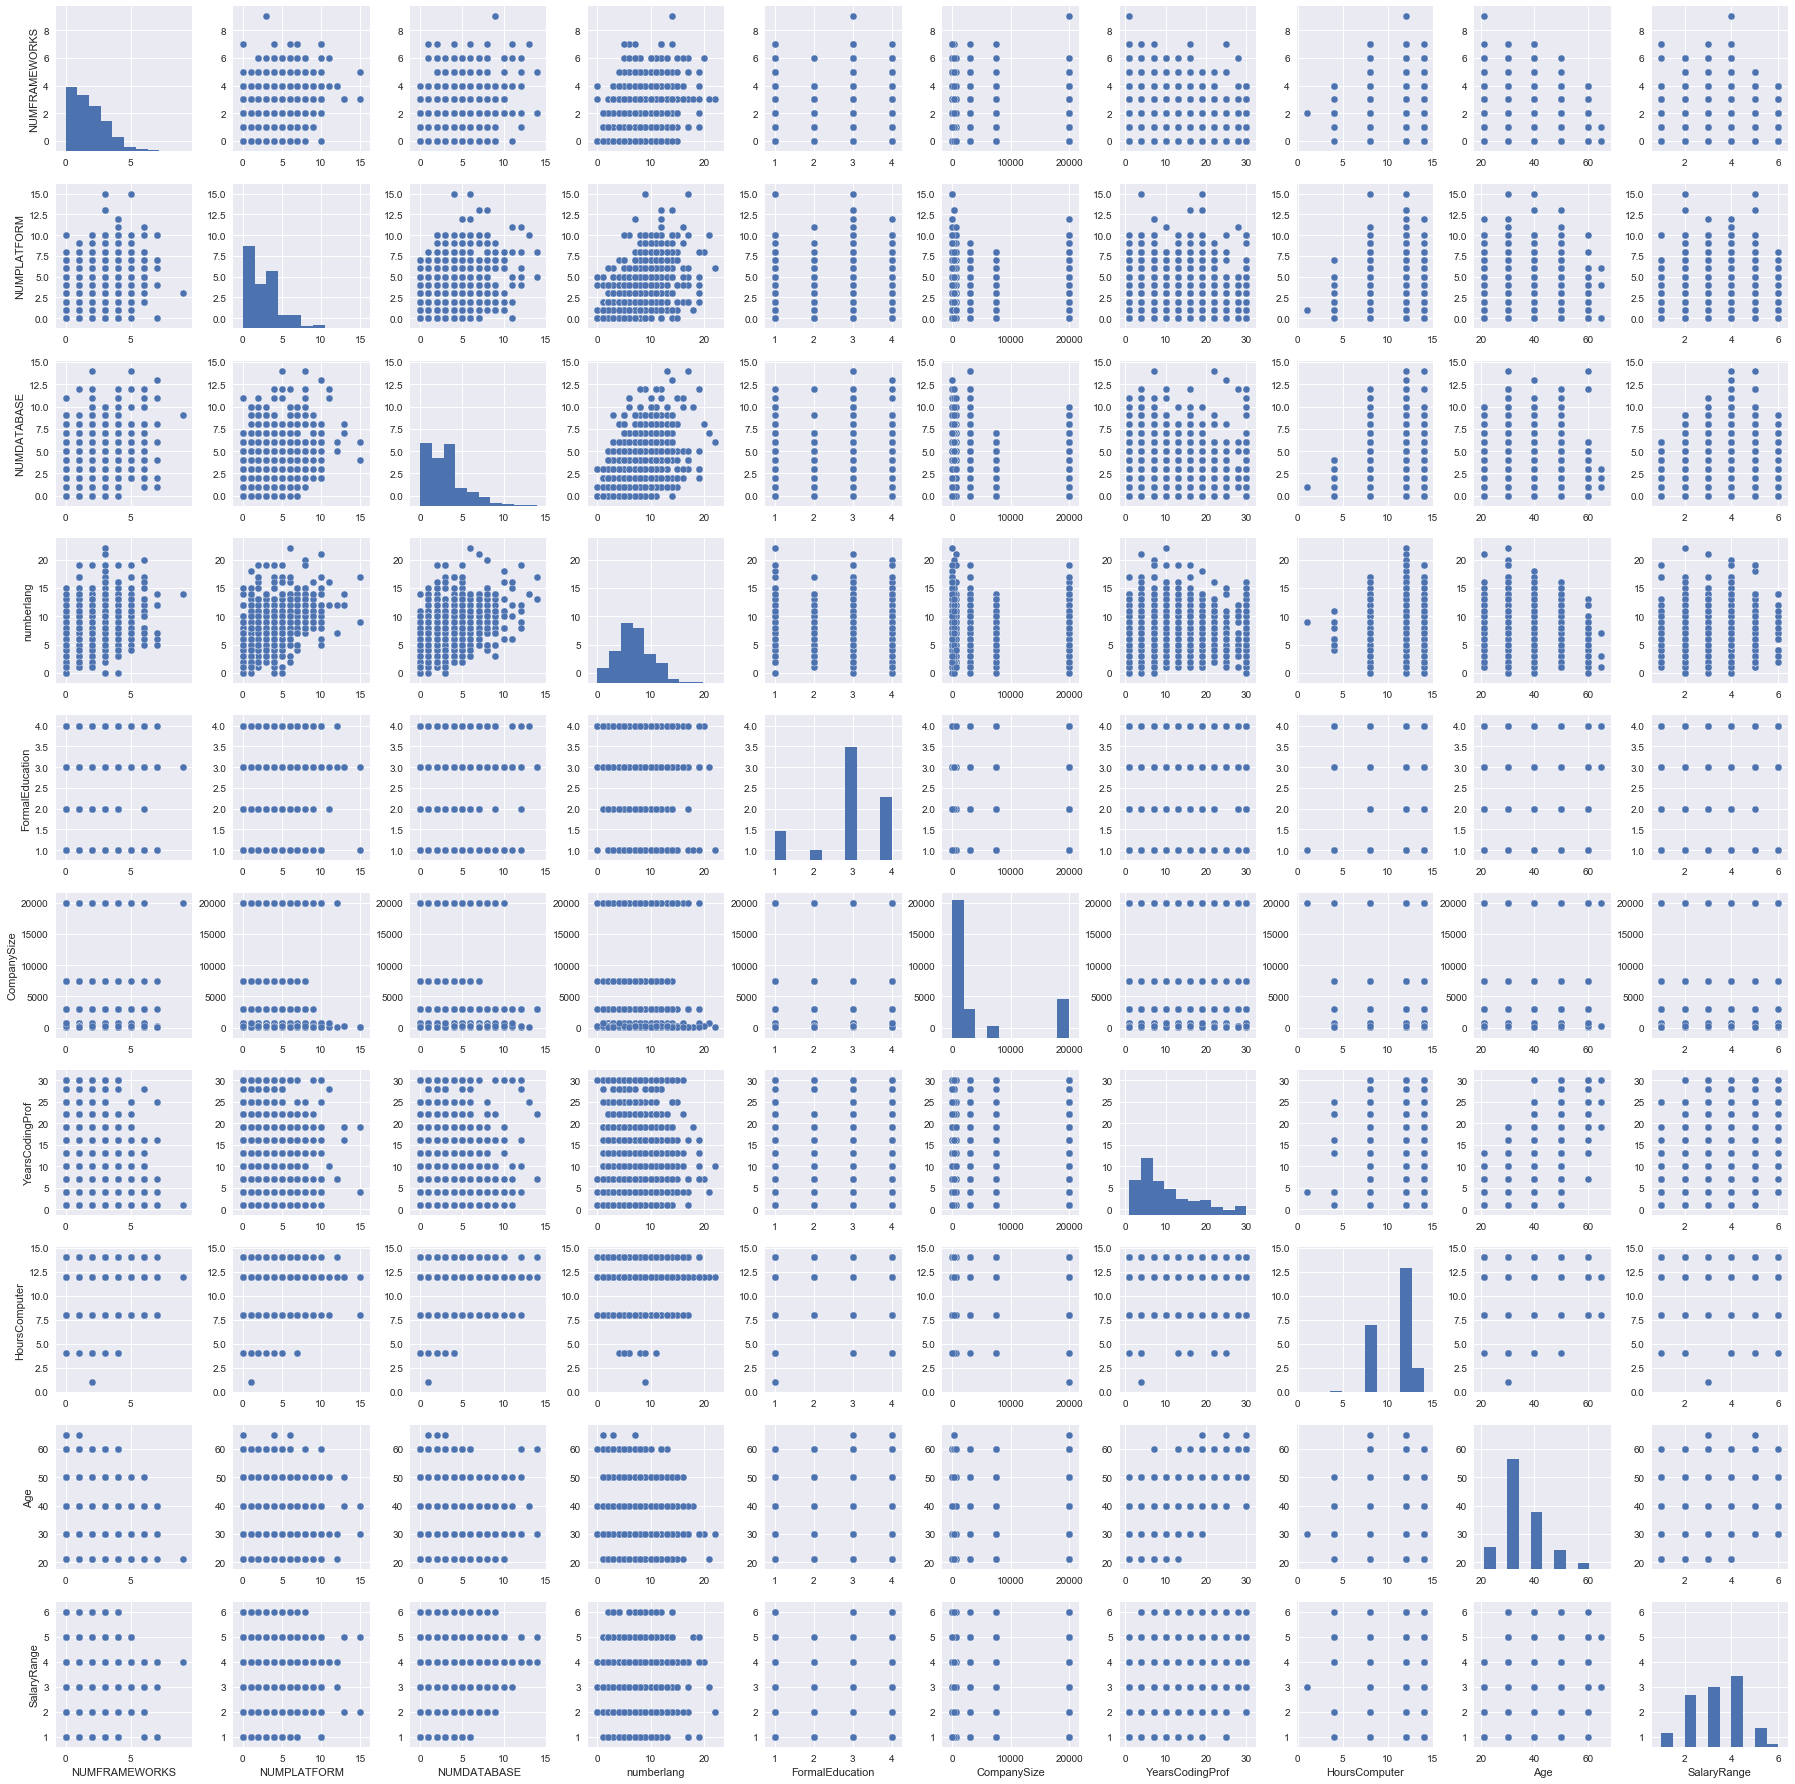

In [5]:
fig = sns.pairplot(df1)
#fig.savefig('pair.png')

In [6]:
df1 = pd.get_dummies(df1, columns=['UndergradMajor', 'Gender', 'RaceEthnicity'], drop_first=True)


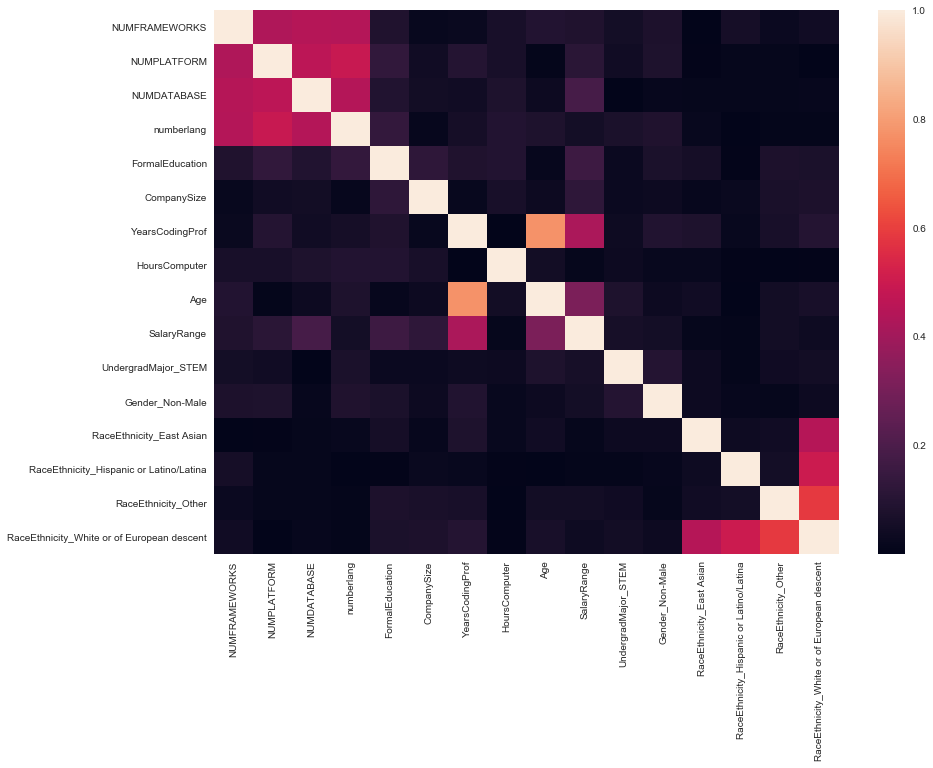

In [7]:
corr = df1.corr()
fig, ax = plt.subplots()
fig.set_size_inches(14, 10)
sns.heatmap(abs(corr), 
        xticklabels=corr.columns,
        yticklabels=corr.columns,)

In [8]:
df1 = df1.dropna()
X = df1.loc[:, df1.columns != 'SalaryRange']
y = df1.loc[:, 'SalaryRange']

In [25]:
df1.columns

Index(['NUMFRAMEWORKS', 'NUMPLATFORM', 'NUMDATABASE', 'numberlang',
       'FormalEducation', 'CompanySize', 'YearsCodingProf', 'HoursComputer',
       'Age', 'SalaryRange', 'UndergradMajor_STEM', 'Gender_Non-Male',
       'RaceEthnicity_East Asian', 'RaceEthnicity_Hispanic or Latino/Latina',
       'RaceEthnicity_Other', 'RaceEthnicity_White or of European descent'],
      dtype='object')

In [10]:
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    return RSS, R_squared

k = 15

remaining_features = list(X.columns.values)
features = []
RSS_list, R_squared_list = [np.inf], [np.inf] #Due to 1 indexing of the loop...
features_list = dict()

for i in range(1,k+1):
    best_RSS = np.inf
    
    for combo in itertools.combinations(remaining_features,1):

            RSS = fit_linear_reg(X[list(combo) + features],y)   #Store temp result 

            if RSS[0] < best_RSS:
                best_RSS = RSS[0]
                best_R_squared = RSS[1] 
                best_feature = combo[0]

    #Updating variables for next loop
    features.append(best_feature)
    remaining_features.remove(best_feature)
    
    #Saving values for plotting
    RSS_list.append(best_RSS)
    R_squared_list.append(best_R_squared)
    features_list[i] = features.copy()

## Forward stepwise selection
## AIC, BIC, Mallows'CP

df_sel = pd.concat([pd.DataFrame({'features':features_list}),pd.DataFrame({'RSS':RSS_list, 'R_squared': R_squared_list})], axis=1, join='inner')
df_sel['numb_features'] = df_sel.index
#Initializing useful variables
m = len(y)
p = 11
hat_sigma_squared = (1/(m - p -1)) * min(df_sel['RSS'])

#Computing
df_sel['C_p'] = (1/m) * (df_sel['RSS'] + 2 * df_sel['numb_features'] * hat_sigma_squared )
df_sel['AIC'] = (1/(m*hat_sigma_squared)) * (df_sel['RSS'] + 2 * df_sel['numb_features'] * hat_sigma_squared )
df_sel['BIC'] = (1/(m*hat_sigma_squared)) * (df_sel['RSS'] +  np.log(m) * df_sel['numb_features'] * hat_sigma_squared )
df_sel['R_squared_adj'] = 1 - ( (1 - df_sel['R_squared'])*(m-1)/(m-df_sel['numb_features'] -1))
df_sel

,features,RSS,R_squared,numb_features,C_p,AIC,BIC,R_squared_adj
1,[YearsCodingProf],1999.843808,0.181103,1,1.014522,1.121888,1.124720,0.180688
2,"[YearsCodingProf, FormalEducation]",1902.104455,0.221126,2,0.965900,1.068121,1.073784,0.220335
3,"[YearsCodingProf, FormalEducation, NUMDATABASE]",1818.689057,0.255283,3,0.924539,1.022381,1.030877,0.254148
4,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1795.332069,0.264847,4,0.913617,1.010304,1.021632,0.263353
5,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1787.604311,0.268011,5,0.910617,1.006986,1.021146,0.266150
...,...,...,...,...,...,...,...,...
11,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1775.144159,0.273113,11,0.909802,1.006085,1.037236,0.269036
12,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1774.397322,0.273419,12,0.910340,1.006680,1.040663,0.268971
13,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1773.894661,0.273625,13,0.911002,1.007412,1.044226,0.268805
14,"[YearsCodingProf, FormalEducation, NUMDATABASE...",1773.424396,0.273818,14,0.911680,1.008162,1.047808,0.268625


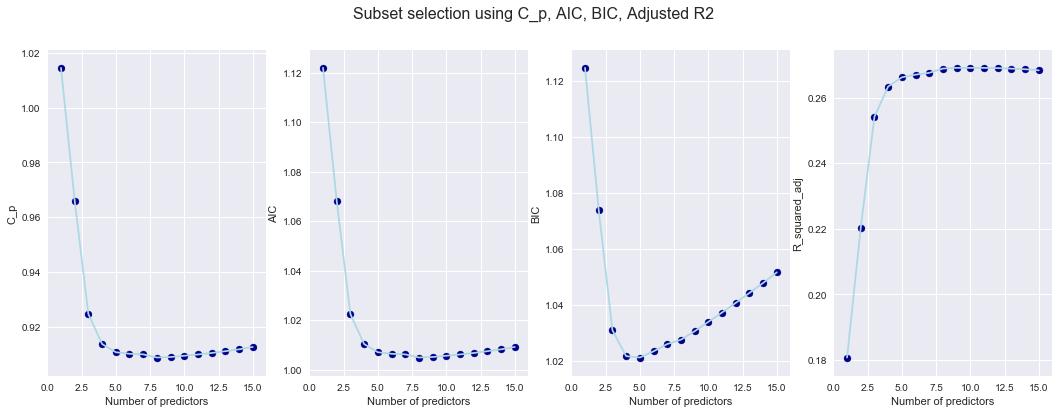

In [11]:
## Plotting the computed values as a function of number of features

variables = ['C_p', 'AIC','BIC','R_squared_adj']
fig = plt.figure(figsize = (18,6))

for i,v in enumerate(variables):
    ax = fig.add_subplot(1, 4, i+1)
    ax.plot(df_sel['numb_features'],df_sel[v], color = 'lightblue')
    ax.scatter(df_sel['numb_features'],df_sel[v], color = 'darkblue')
    if v == 'R_squared_adj':
        ax.plot(df_sel[v].idxmax(),df_sel[v].max(), marker = 'x', markersize = 20)
    else:
        ax.plot(df_sel[v].idxmin(),df_sel[v].min(), marker = 'x', markersize = 20)
    ax.set_xlabel('Number of predictors')
    ax.set_ylabel(v)

fig.suptitle('Subset selection using C_p, AIC, BIC, Adjusted R2', fontsize = 16)
plt.show()

In [12]:
selected_fea = df_sel.iloc[4,0]
X_new = X[selected_fea]
selected_fea

['YearsCodingProf',
 'FormalEducation',
 'NUMDATABASE',
 'CompanySize',
 'RaceEthnicity_White or of European descent']

Training score:  0.2952454510784247
MSE: 1091644779.103509


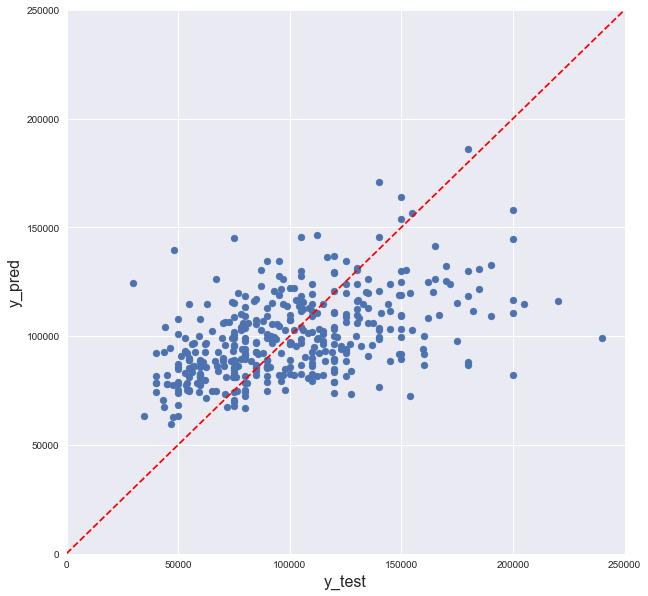

In [15]:
## Linear regression using the selected 14 features 

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_old, test_size=0.2, random_state=0)
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)

fig3, ax = plt.subplots()
fig3.set_size_inches(10, 10)
ax.set_xlim(0, 250000)
ax.set_ylim(0, 250000)
plt.scatter(y_test, y_pred)
plt.xlabel('y_test', fontsize=16)
plt.ylabel('y_pred', fontsize=16)

ab = np.linspace(0, 250000, 1000)
plt.plot(ab, ab, linestyle='dashed', color='red')
#print('Selected features: ', v14)
print('Training score: ', lm.score(X_train,y_train))
##print('Testing score: ', lm.score(X_test,y_test))
print('MSE:', mean_squared_error(y_test, y_pred)) 

Text(0,0.5,'residuals')

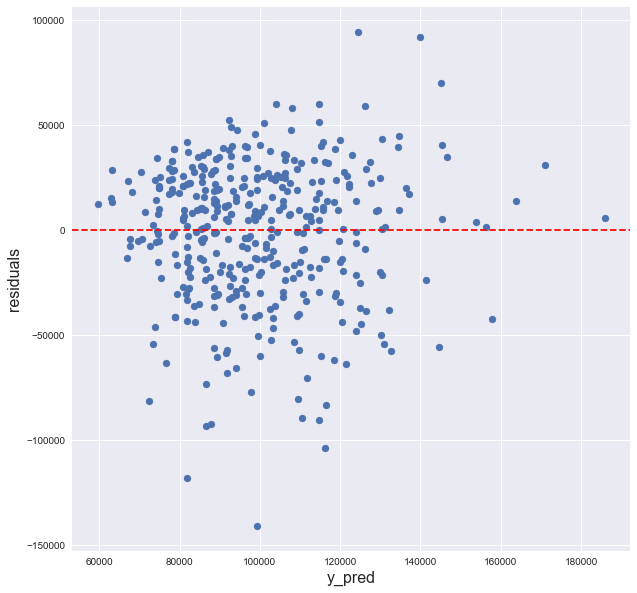

In [16]:
fig3, ax = plt.subplots()
fig3.set_size_inches(10, 10)
plt.scatter(y_pred, (y_pred-y_test))
plt.axhline(y=0, color='r', linestyle='--')
fig.set_size_inches(10, 10)

plt.xlabel('y_pred', fontsize = 16)
plt.ylabel('residuals', fontsize = 16)

In [18]:
#Machine learning models from sklearn
from sklearn.naive_bayes import GaussianNB,MultinomialNB  # Gaussian naive Bayes classifier
from sklearn.preprocessing import LabelEncoder
from IPython.display import display
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

The accuracy of the decision tree with max depth of %i is %f 1 0.3924050632911392
The accuracy of the decision tree with max depth of %i is %f 2 0.38734177215189874
The accuracy of the decision tree with max depth of %i is %f 3 0.3848101265822785
The accuracy of the decision tree with max depth of %i is %f 4 0.3924050632911392
The accuracy of the decision tree with max depth of %i is %f 5 0.3924050632911392
The accuracy of the decision tree with max depth of %i is %f 6 0.3924050632911392
The accuracy of the decision tree with max depth of %i is %f 7 0.37721518987341773
The accuracy of the decision tree with max depth of %i is %f 8 0.3721518987341772
The accuracy of the decision tree with max depth of %i is %f 9 0.37468354430379747
The accuracy of the decision tree with max depth of %i is %f 10 0.3670886075949367
The accuracy of the decision tree with max depth of %i is %f 11 0.3569620253164557
The accuracy of the decision tree with max depth of %i is %f 12 0.3670886075949367
The accura

Text(0.5,0.98,'Max depth vs accuracy')

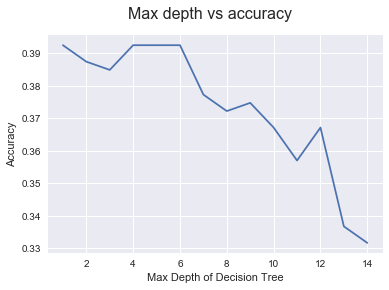

In [19]:
## Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0) 

# training a DescisionTreeClassifier 
from sklearn.tree import DecisionTreeClassifier 
'''
dtree_model = DecisionTreeClassifier(max_depth = 4).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
  
# creating a confusion matrix 
cm_tree = confusion_matrix(y_test, dtree_predictions) 
accuracy_tree = accuracy_score(y_test, dtree_predictions)
print('The accuracy of the model is ', accuracy_tree)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_tree,classes=[1,2,3,4,5,6],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_tree, classes=[1,2,3,4,5,6], normalize=True,
                      title='Normalized confusion matrix')

plt.show()
'''
acc = []
depth = []
for i in range(1, 15):
    dtree_model = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train) 
    dtree_predictions = dtree_model.predict(X_test)
    accuracy_tree = accuracy_score(y_test, dtree_predictions)
    print('The accuracy of the decision tree with max depth of %i is %f', i, accuracy_tree)
    depth.append(i)
    acc.append(accuracy_tree)
#pd.concat([pd.DataFrame({'index':index}),pd.DataFrame({'accuracy':accuracy_tree})]
#print(df_depth)
df_depth = pd.DataFrame({'max_depth': depth, 'accuracy': acc})
plt.plot(df_depth.max_depth, df_depth.accuracy)
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.suptitle('Max depth vs accuracy', fontsize = 16)


The accuracy of the decision tree with max depth of %i is %f 1 0.3924050632911392
The accuracy of the decision tree with max depth of %i is %f 2 0.38734177215189874
The accuracy of the decision tree with max depth of %i is %f 3 0.3848101265822785
The accuracy of the decision tree with max depth of %i is %f 4 0.40759493670886077
The accuracy of the decision tree with max depth of %i is %f 5 0.4


Text(0.5,0.98,'Max depth vs accuracy')

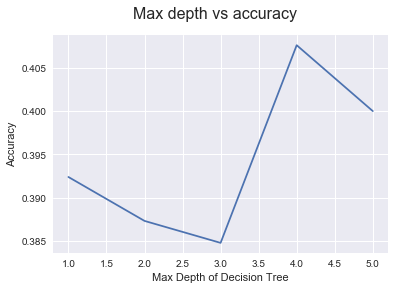

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state = 0) 
acc = []
depth = []
for i in range(1, 6):
    dtree_model = DecisionTreeClassifier(max_depth = i).fit(X_train, y_train) 
    dtree_predictions = dtree_model.predict(X_test)
    accuracy_tree = accuracy_score(y_test, dtree_predictions)
    print('The accuracy of the decision tree with max depth of %i is %f', i, accuracy_tree)
    depth.append(i)
    acc.append(accuracy_tree)
#pd.concat([pd.DataFrame({'index':index}),pd.DataFrame({'accuracy':accuracy_tree})]
#print(df_depth)
df_depth = pd.DataFrame({'max_depth': depth, 'accuracy': acc})
plt.plot(df_depth.max_depth, df_depth.accuracy)
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.suptitle('Max depth vs accuracy', fontsize = 16)



The accuracy of the model is  0.4
Confusion matrix, without normalization
[[ 5 14  5  6  0  0]
 [ 1 36 22 29  0  0]
 [ 1 19 24 55  1  0]
 [ 0 18 23 92  6  0]
 [ 0  5  2 27  1  0]
 [ 0  0  0  3  0  0]]
Normalized confusion matrix
[[0.16666667 0.46666667 0.16666667 0.2        0.         0.        ]
 [0.01136364 0.40909091 0.25       0.32954545 0.         0.        ]
 [0.01       0.19       0.24       0.55       0.01       0.        ]
 [0.         0.1294964  0.16546763 0.6618705  0.04316547 0.        ]
 [0.         0.14285714 0.05714286 0.77142857 0.02857143 0.        ]
 [0.         0.         0.         1.         0.         0.        ]]


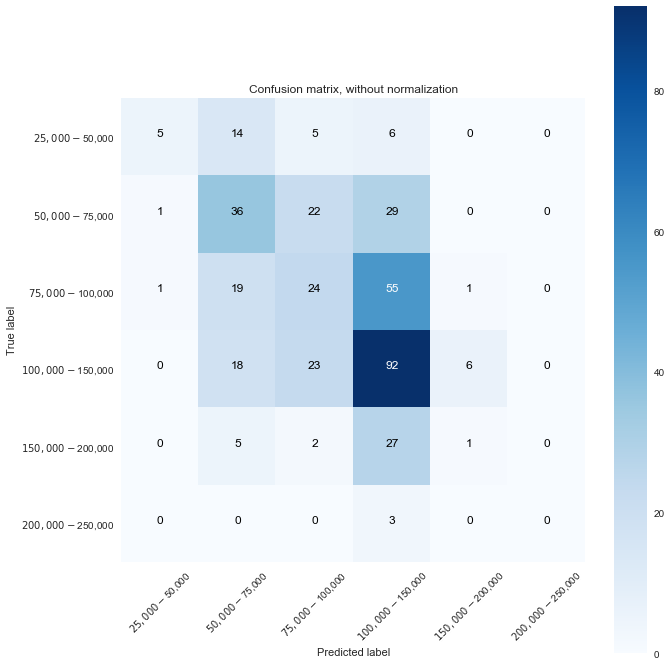

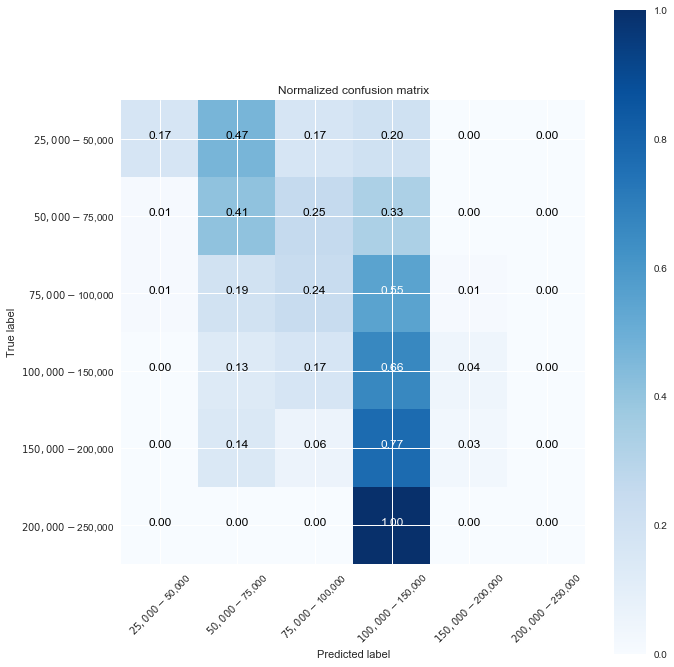

In [26]:

labels1 = ['$25,000-$50,000', '$50,000-$75,000', '$75,000-$100,000', '$100,000-$150,000', '$150,000-$200,000', '$200,000-$250,000']

  
# creating a confusion matrix 
cm_tree = confusion_matrix(y_test, dtree_predictions) 
accuracy_tree = accuracy_score(y_test, dtree_predictions)
print('The accuracy of the model is ', accuracy_tree)

# Plot non-normalized confusion matrix

plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_tree,classes=labels1,
                      title='Confusion matrix, without normalization')
plt.grid('off')
# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_tree, classes=labels1, normalize=True,
                      title='Normalized confusion matrix')

#plt.savefig('save_file.png')

1 0.34177215189873417
2 0.32151898734177214
3 0.3291139240506329
4 0.3240506329113924
5 0.3341772151898734
6 0.3291139240506329
7 0.3367088607594937
8 0.3569620253164557
9 0.3518987341772152
10 0.3620253164556962
11 0.369620253164557
12 0.3594936708860759
13 0.3518987341772152
14 0.3620253164556962
15 0.3620253164556962
16 0.3594936708860759
17 0.3721518987341772
18 0.37721518987341773
19 0.37721518987341773
20 0.369620253164557
21 0.3721518987341772
22 0.36455696202531646
23 0.3594936708860759
24 0.3620253164556962
25 0.369620253164557
26 0.35443037974683544
27 0.37721518987341773
28 0.37721518987341773
29 0.3670886075949367
30 0.379746835443038
31 0.37721518987341773
32 0.3822784810126582
33 0.37721518987341773
34 0.379746835443038
35 0.369620253164557
36 0.369620253164557
37 0.3493670886075949
38 0.3594936708860759
39 0.369620253164557
40 0.369620253164557
41 0.3594936708860759
42 0.3620253164556962
43 0.369620253164557
44 0.3670886075949367
45 0.369620253164557
46 0.379746835443038

Text(0.5,0.98,'KNN vs accuracy')

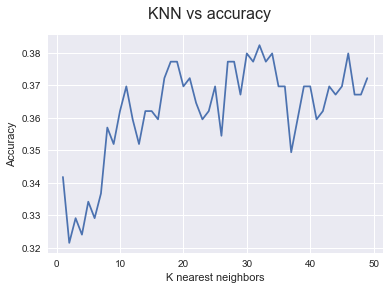

In [27]:
from sklearn.neighbors import KNeighborsClassifier 
kk = []
acc = []
for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train) 
  
    # accuracy on X_test 
    accuracy = knn.score(X_test, y_test) 
    print(k, accuracy) 
    kk.append(k)
    acc.append(accuracy)
#pd.concat([pd.DataFrame({'index':index}),pd.DataFrame({'accuracy':accuracy_tree})]
#print(df_depth)
df_knn = pd.DataFrame({'K': kk, 'accuracy': acc})
plt.plot(df_knn.K, df_knn.accuracy)
plt.xlabel('K nearest neighbors')
plt.ylabel('Accuracy')
plt.suptitle('KNN vs accuracy', fontsize = 16)


The accuracy of the model is  0.3822784810126582
Confusion matrix, without normalization
[[ 1 15  9  5  0  0]
 [ 0 48 22 18  0  0]
 [ 1 31 27 40  1  0]
 [ 0 28 37 74  0  0]
 [ 0  3 13 18  1  0]
 [ 0  0  1  2  0  0]]
Normalized confusion matrix
[[0.03333333 0.5        0.3        0.16666667 0.         0.        ]
 [0.         0.54545455 0.25       0.20454545 0.         0.        ]
 [0.01       0.31       0.27       0.4        0.01       0.        ]
 [0.         0.20143885 0.26618705 0.5323741  0.         0.        ]
 [0.         0.08571429 0.37142857 0.51428571 0.02857143 0.        ]
 [0.         0.         0.33333333 0.66666667 0.         0.        ]]


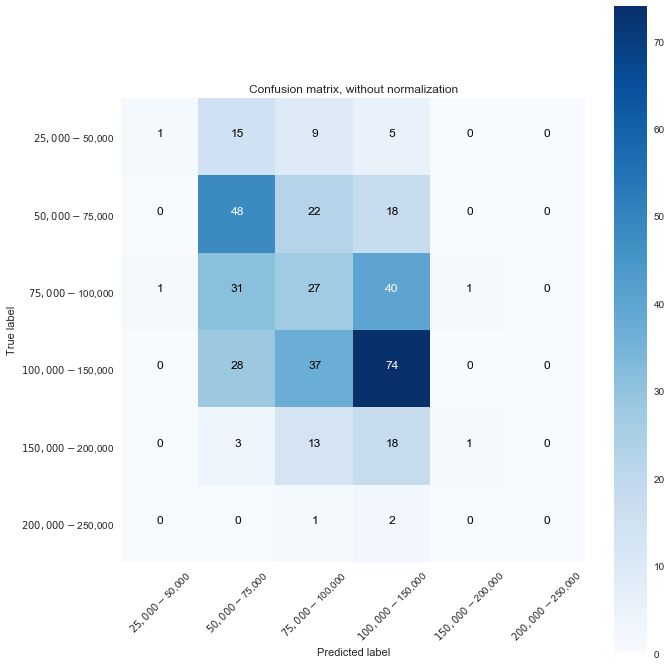

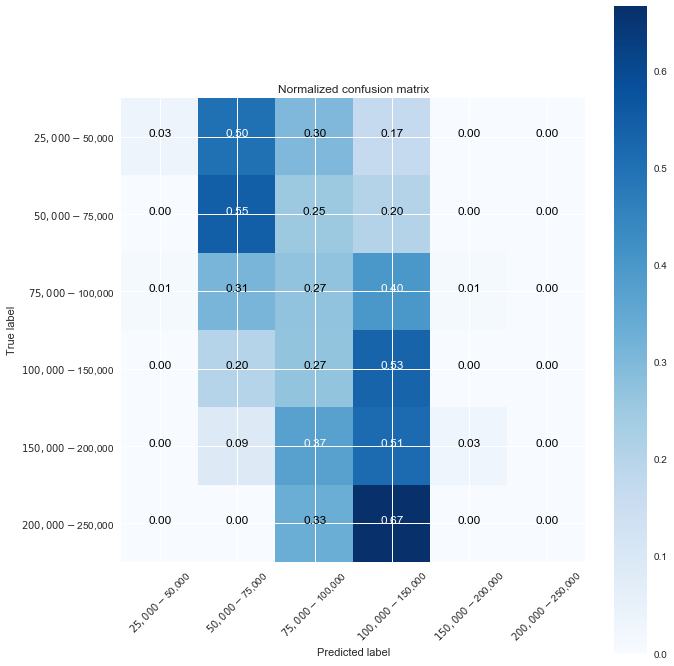

In [29]:
knn = KNeighborsClassifier(n_neighbors = 32).fit(X_train, y_train)
knn_pred = knn.predict(X_test) 
  
# creating a confusion matrix 
cm_knn = confusion_matrix(y_test, knn_pred) 
accuracy_knn = accuracy_score(y_test, knn_pred)
print('The accuracy of the model is ', accuracy_knn)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_knn,classes=labels1,
                      title='Confusion matrix, without normalization')
plt.grid('off')

# Plot normalized confusion matrix
plt.figure(figsize=(10,10))
plot_confusion_matrix(cm_knn, classes=labels1, normalize=True,
                      title='Normalized confusion matrix')

In [17]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy)

0.3670886075949367
